# Laboratory work nr. 6

### Task nr. 1

In [1]:
import sympy
from sympy import sympify, lambdify
from sympy.abc import x, y, z
import numpy as np
import scipy.integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

Computing:

$$
    \int_0^3{x^{\frac{3}{2}} \left(x^3 + x^{\frac{1}{3}}\right)}dx
$$

In [2]:
expr = sympify('x**(3/2) * (x**3 + x**(1/3))')
expr

x**(3/2)*(x**(1/3) + x**3)

In [3]:
# the symbolic method
sympy.integrate(expr, (x, 0, 3))

54*3**(5/6)/17 + 486*sqrt(3)/11

In [4]:
# "_" means the result of the previous operation
_.evalf(10)

84.46013473

In [5]:
f = lambdify(x, expr, 'numpy')
# the numeric method
# this function returns a tuple where the first element is the result
# and the second element is the error
scipy.integrate.quadrature(f, 0, 3)[0]

84.46013366910955

Computing:
$$
    \int_0^2{\frac{y^{\frac{1}{3}} \left(y^2 + 2\right)}{y^{\frac{3}{2}} + 1}}dy
$$

In [6]:
expr = sympify('(y**(1/3) * (y**2 + 2)) / (y**(3/2) + 1)')
expr

y**(1/3)*(y**2 + 2)/(y**(3/2) + 1)

In [7]:
f = lambdify(y, expr, 'numpy')
scipy.integrate.quadrature(f, 0, 2)[0]

/usr/local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:259: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.348041e-07
  warnings.warn(


2.966346820979706

### Task nr. 2

Computing:

$$
    \int_1^3{\int_1^2{\left(x + x^\frac{1}{3} y^\frac{2}{5}\right)e^{x + y}}dx}dy
$$

In [8]:
expr = sympify('(x + x**(1/3) * y**(2/5)) * exp(x + y)')
expr

(x**(1/3)*y**(2/5) + x)*exp(x + y)

In [9]:
f = lambdify((x, y), expr, 'numpy')
# This function again returns a tuple where the first element is the result
# and the second element is the error
scipy.integrate.dblquad(f, 1, 2, 1, 3)[0]

315.14628379526084

### Task nr. 3

Computing: 
$$
    \int_1^3{
        \int_0^1{
            \int_2^3{
                \left(y + x^\frac{1}{4} z^\frac{2}{3}\right) \tan\left(y\right)
            }dx
        }dy
    }dz
$$

In [10]:
expr = sympify('(y + x**(1/4) * z**(2/3)) * tan(y)')
expr

(x**(1/4)*z**(2/3) + y)*tan(y)

In [11]:
f = lambdify((x, y, z), expr, 'numpy')
scipy.integrate.tplquad(f, 2, 3, 0, 1, 1, 3)[0]

3.5268012804168087

### Task nr. 4

a) Oscilaţiile libere în lipsa rezistenţei mediului.

In [12]:
def system(x, t):
    w0 = 7
    return x[1], -w0**2 * x[0]

In [13]:
# t = np.linspace(0, 10)
t = np.arange(0, 10, 0.01)
x = odeint(system, (0, 2), t)[ : , 0]

Text(0.5, 1.0, 'Oscilaţiile libere în lipsa rezistenţei mediului')

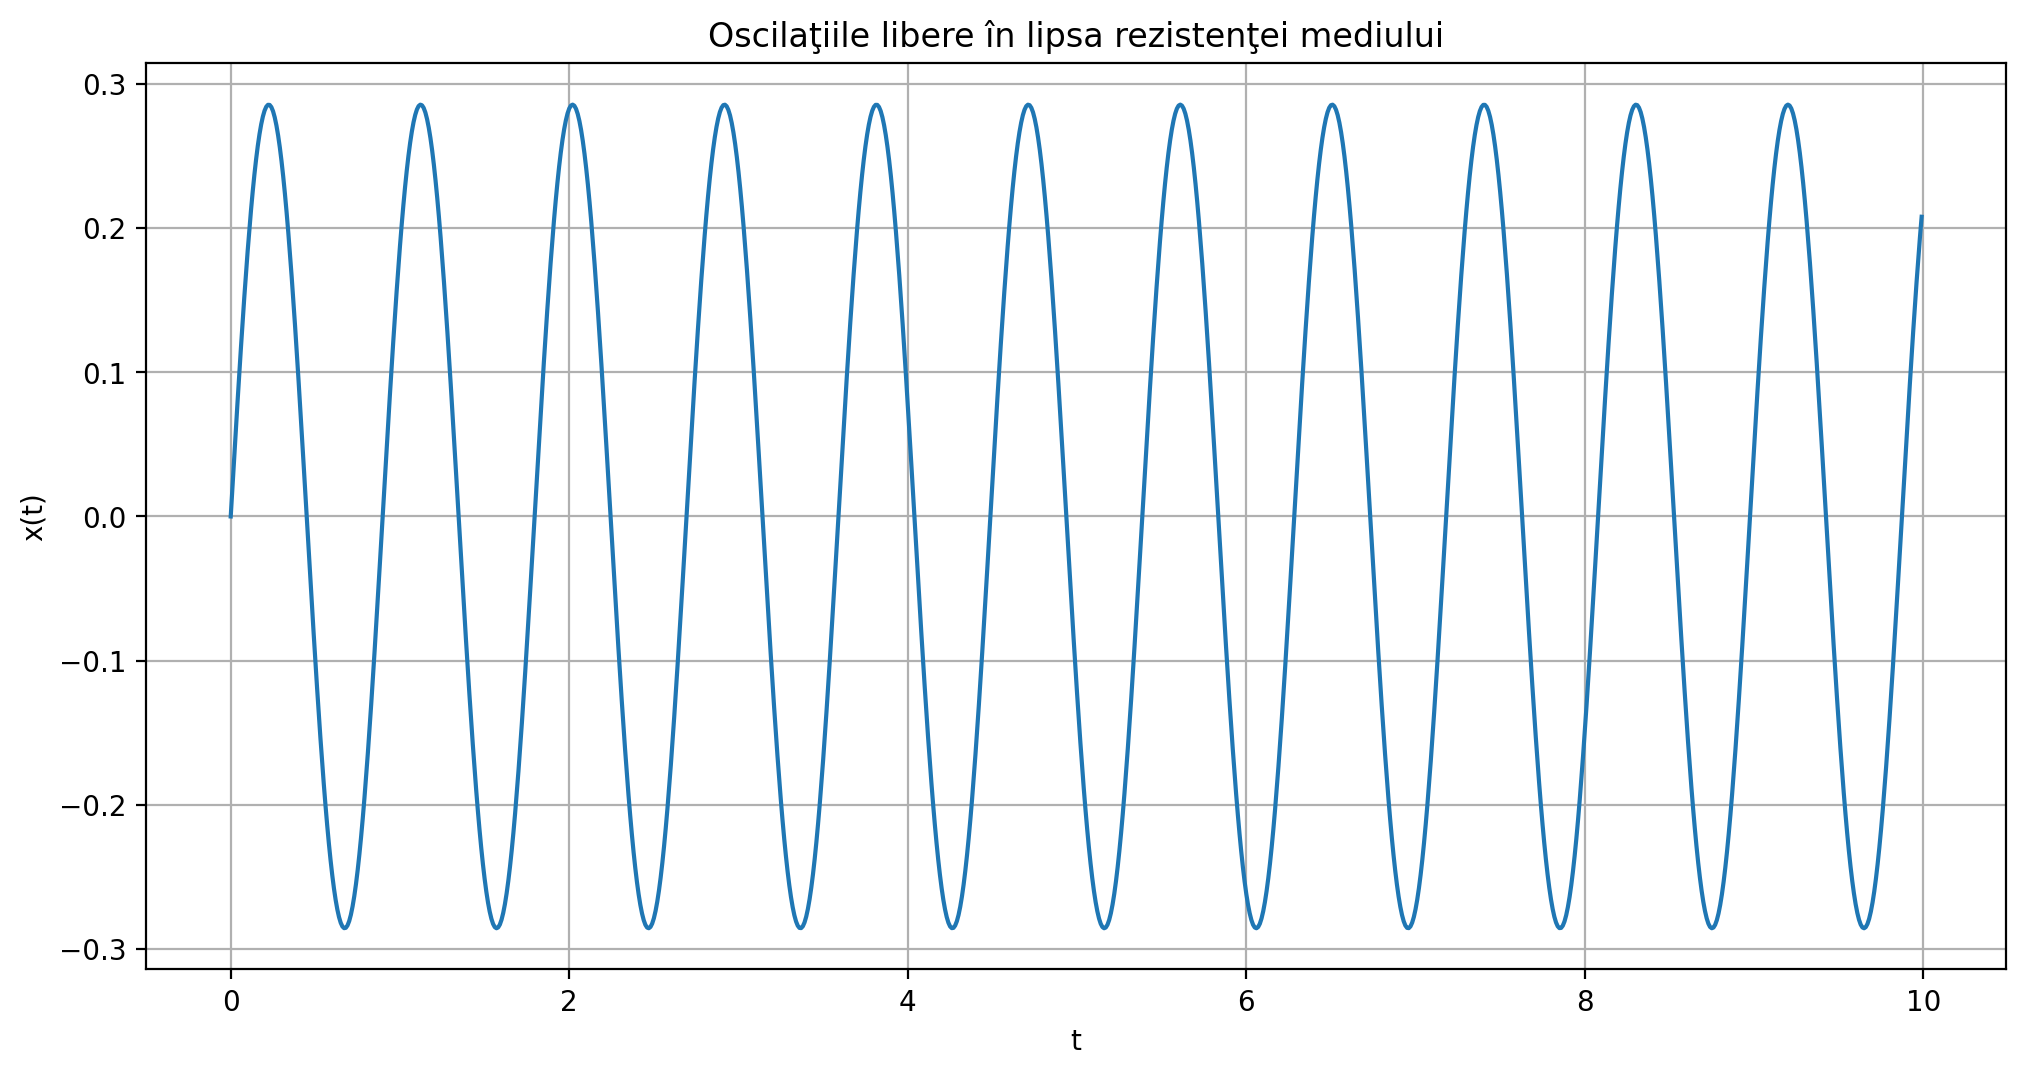

In [14]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.title('Oscilaţiile libere în lipsa rezistenţei mediului')

In [15]:
# Amplitudinea 

x0 = 4
V0 = 3
w0 = 7;
A = math.sqrt(x0**2 + (V0**2 / w0**2))
A

4.02289366866535

In [16]:
# Perioada

T = 2 * math.pi / w0
T

0.8975979010256552

In [17]:
# Faza Initiala

eps = math.atan(w0 * x0 / V0)
eps

1.464060654145761

In [18]:
# Frecventa

F = w0 / ( 2 * math.pi )
F

1.1140846016432675

b) Oscilaţiile libere în prezenţa rezistenţei mediului.

In [19]:
def system(x, t):
    h = 1
    w0 = 7
    return x[1], -2*h*x[1] - w0**2*x[0]

In [20]:
# t = np.linspace(0, 10)
t = np.arange(0, 10, 0.01)
x = odeint(system, (0, 2), t)[ : , 0]

Text(0.5, 1.0, 'Oscilaţiile libere în prezenţa rezistenţei mediului')

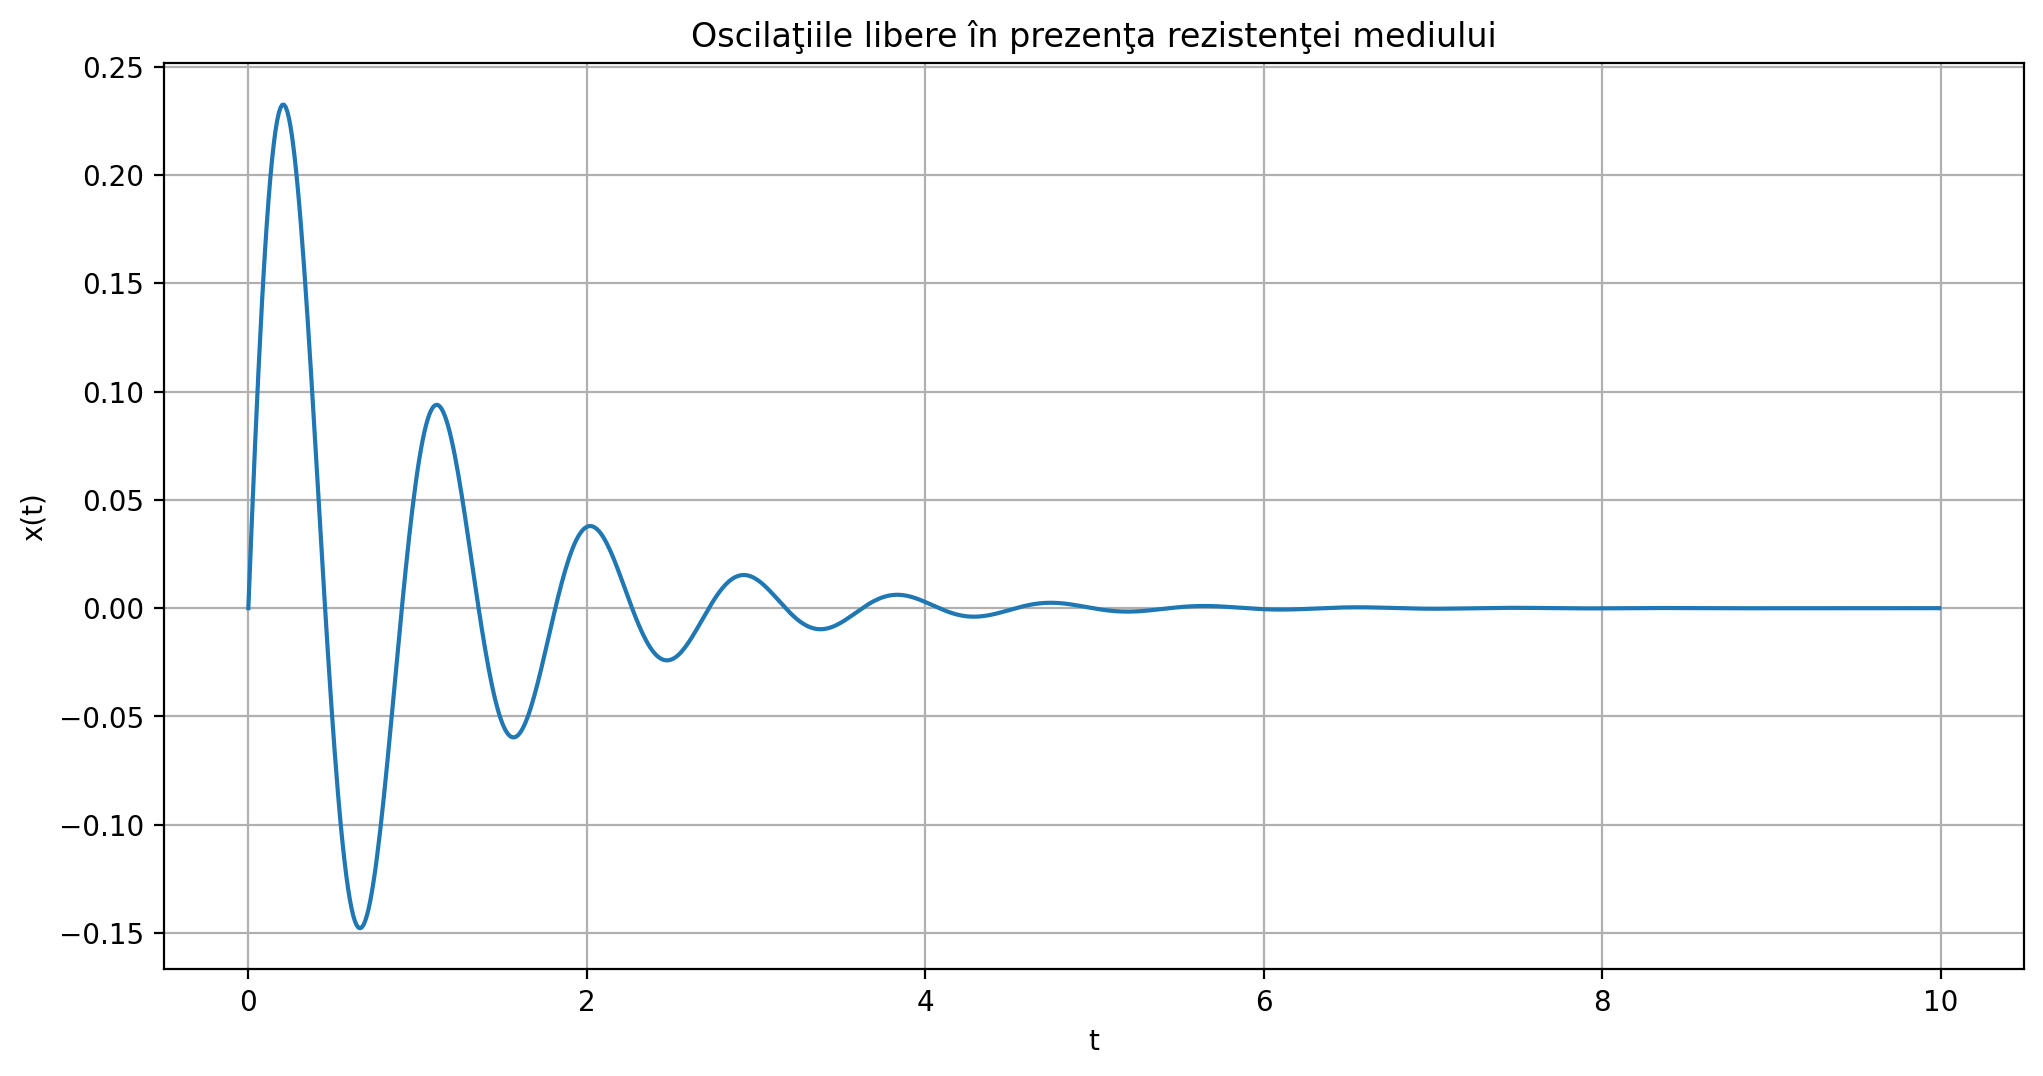

In [21]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.title('Oscilaţiile libere în prezenţa rezistenţei mediului')

In [22]:
# Amplitudinea

w0 = 7
x0 = 4
V0 = 3
h = 0.1
w = math.sqrt(w0**2 - h**2)
A = math.sqrt(x0**2 + ( (V0+h*x0)**2 / w**2))
A

4.029387859685434

In [23]:
# Perioada

T = 2 * math.pi / w
T

0.8976895066697193

In [24]:
# Faza Initiala

eps = math.atan( ( w * x0 ) / ( V0 + h*x0 ) )
eps

1.4499471351605264

In [25]:
# Frecventa

F = 1 / T
F

1.11397091374036

In [26]:
# Decrementul de amortizare

eta = math.exp(-h * T)
eta

0.9141423728584548

In [27]:
# Decrementul logaritmic de amortizare

lamda = h*T;
lamda

0.08976895066697194

c) Oscilaţiile forţate în lipsa rezistenţei mediului.

In [28]:
def system(x, t):
    H0 = 6
    w0 = 7
    p = 10.5
    return x[1], -w0**2*x[0] + H0*math.sin(p*t)

In [29]:
# t = np.linspace(0, 10)
t = np.arange(0, 10, 0.01)
x = odeint(system, (0, 2), t)[ : , 0]

Text(0.5, 1.0, 'Oscilaţiile forţate în lipsa rezistenţei mediului')

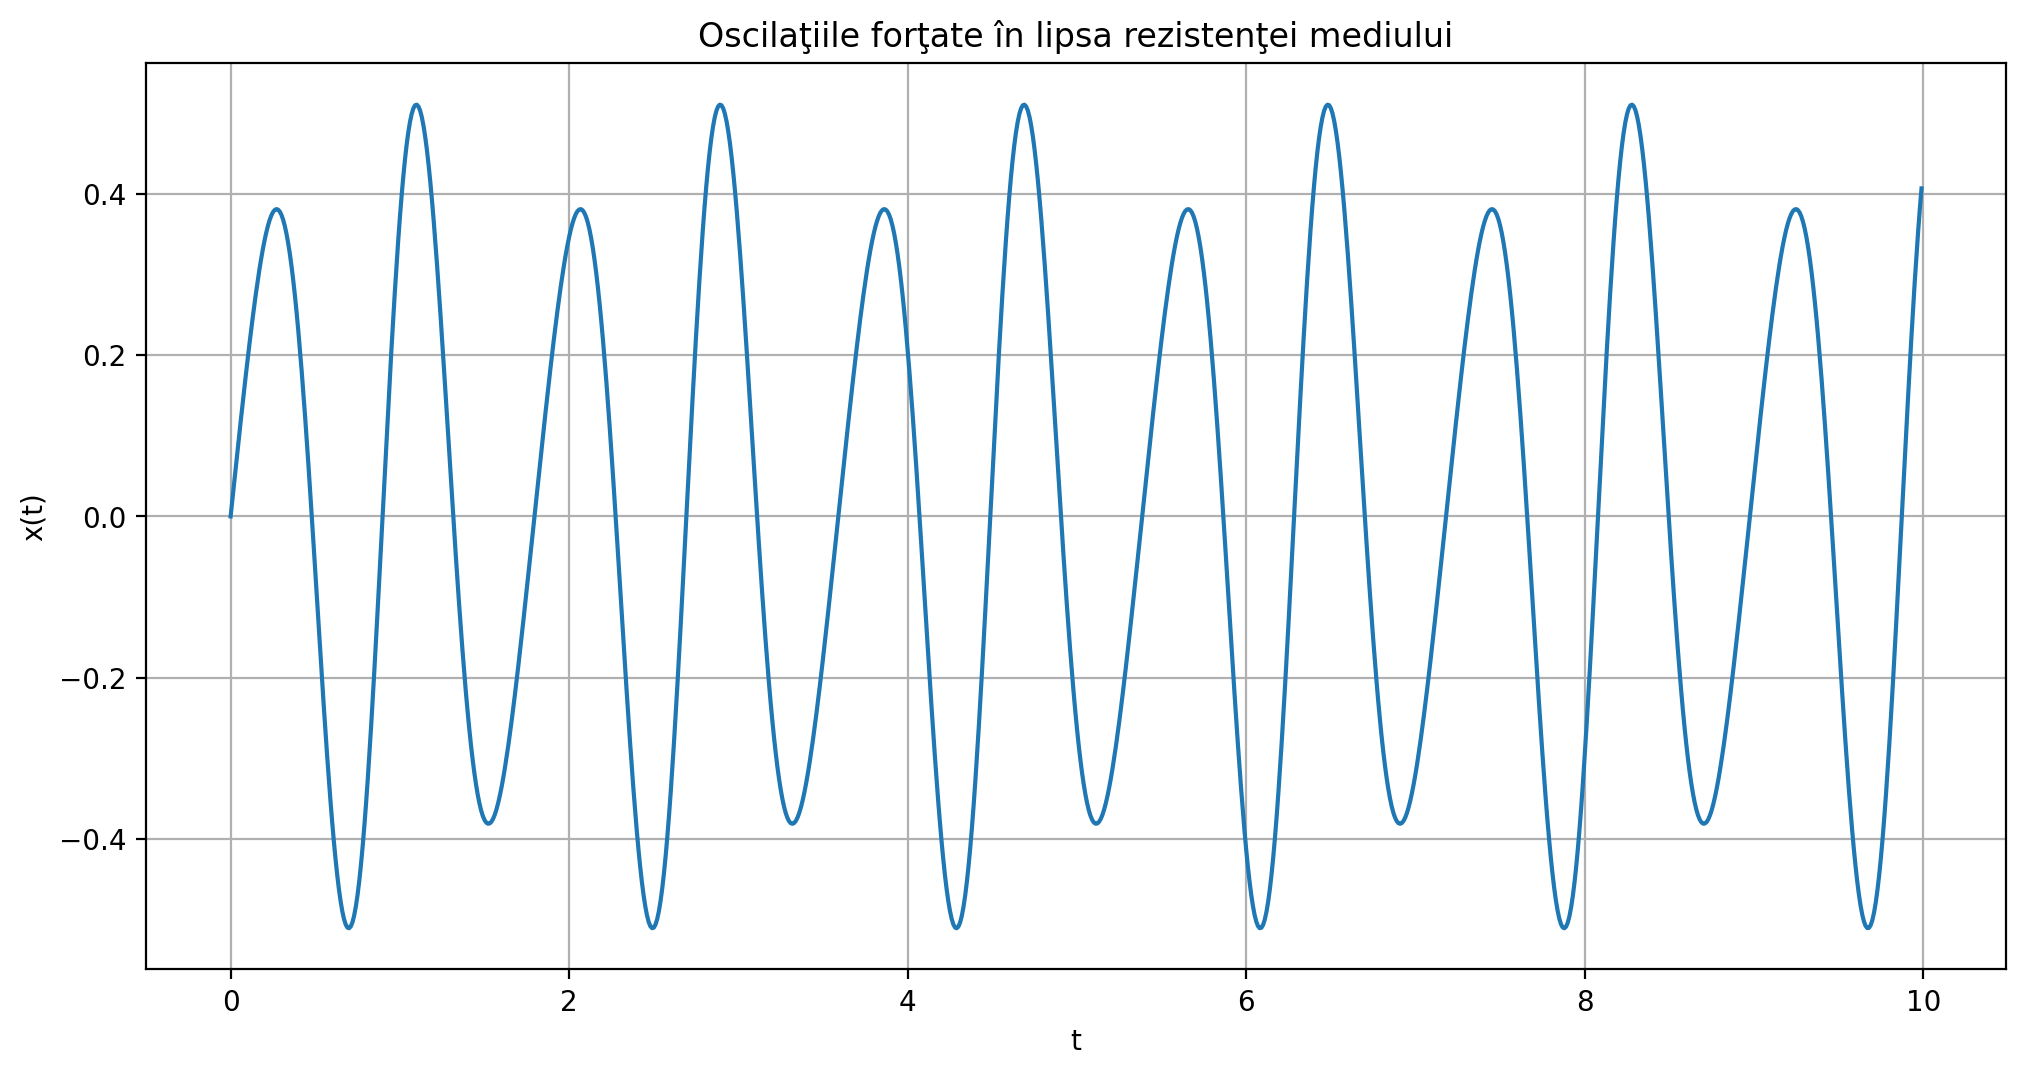

In [30]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.title('Oscilaţiile forţate în lipsa rezistenţei mediului')

d) Oscilaţiile forţate în prezenţa rezistenţei mediului.

In [31]:
def system(x, t):
    h = 3
    w0 = 7
    H0 = 6
    p = 30
    return x[1], -2*h*x[1] - w0**2*x[0] + H0*math.sin(p*t)

In [32]:
# t = np.linspace(0, 10)
t = np.arange(0, 10, 0.01)
x = odeint(system, (0, 2), t)[ : , 0]

Text(0.5, 1.0, 'Oscilaţiile forţate în prezența rezistenţei mediului')

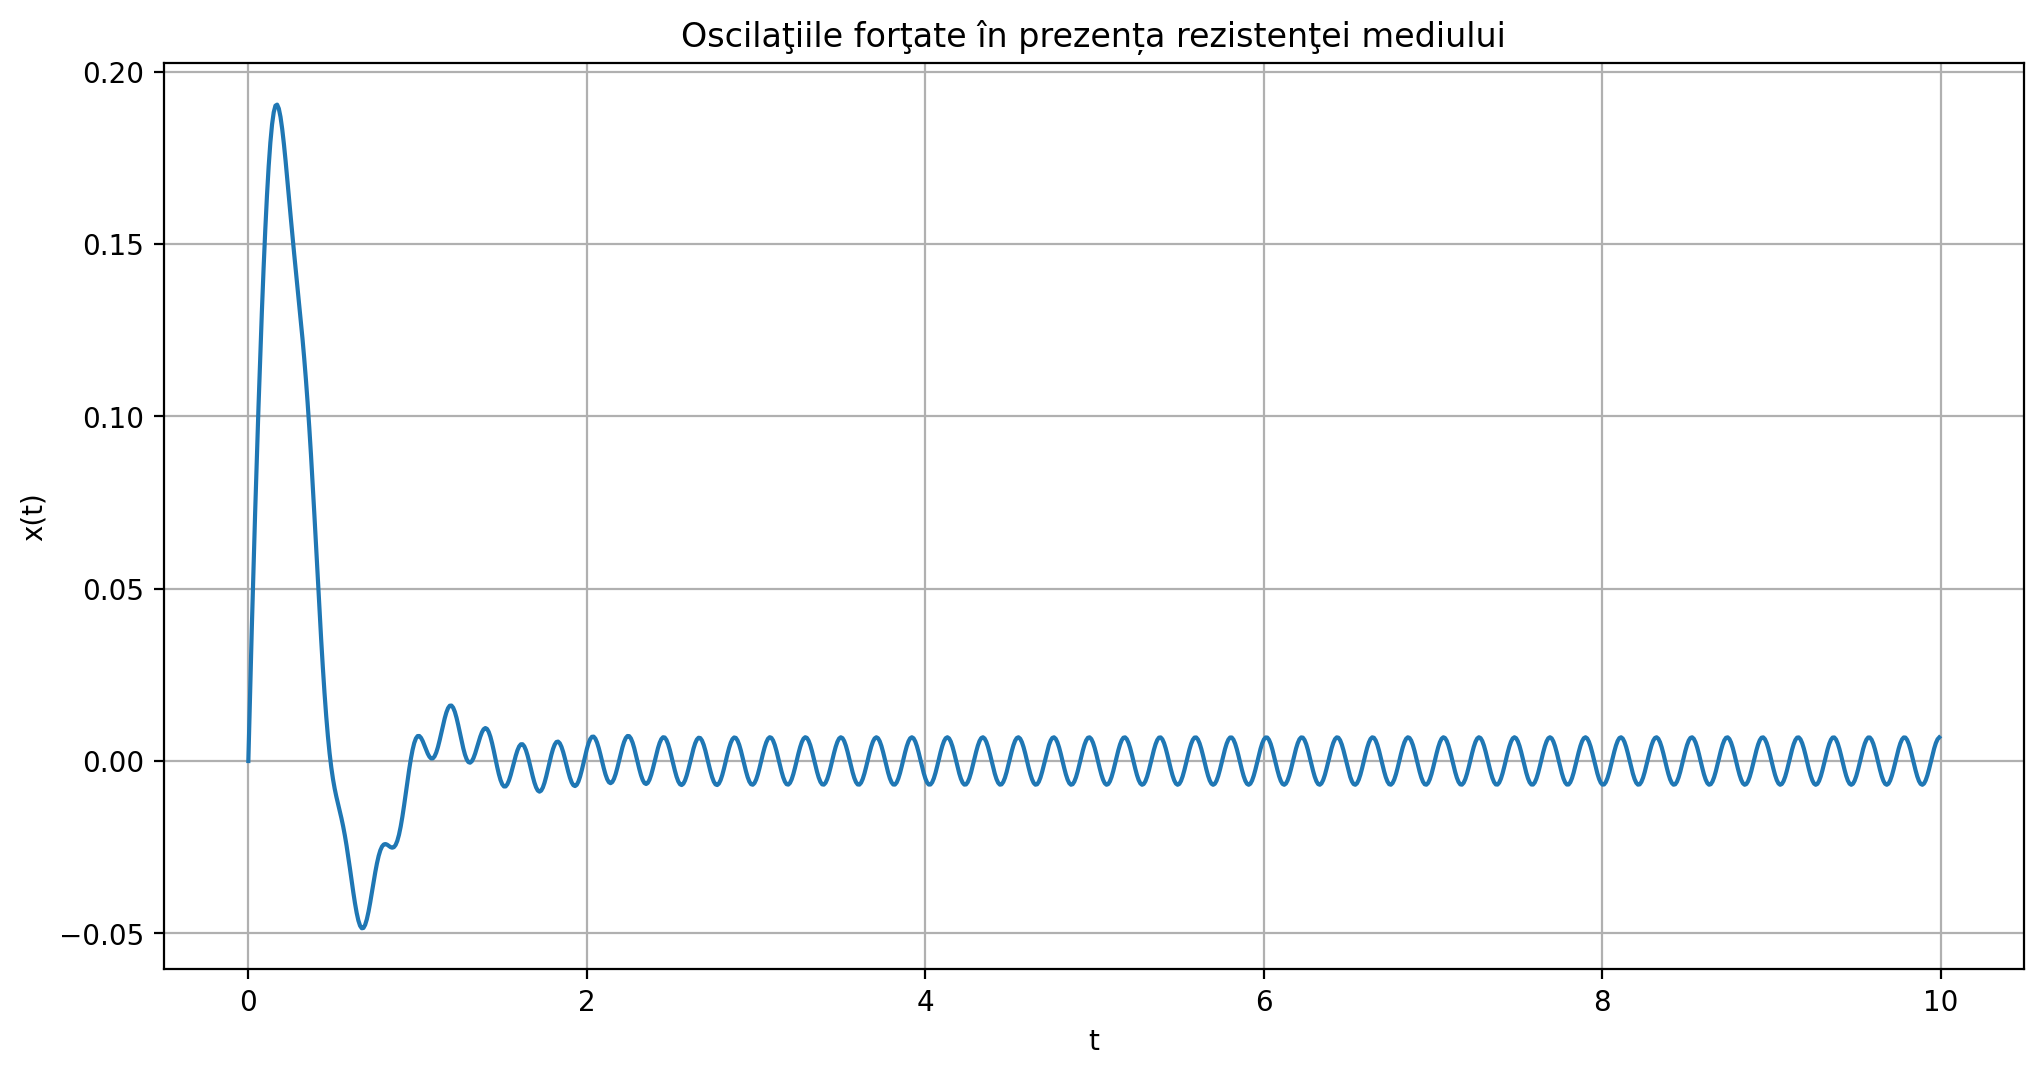

In [33]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.title('Oscilaţiile forţate în prezența rezistenţei mediului')